In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
master = pd.read_csv("cleaned_data.csv").iloc[:, 1:]
master

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,Healthy Eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,Healthy Eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,Veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,Veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,Culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,Culture,positive,72


In [30]:
top_5 = pd.read_csv("top_5_categories.csv")
top_5

,Category,Score
0,Animals,74965
1,Science,71168
2,Healthy Eating,69339
3,Technology,68738
4,Food,66676


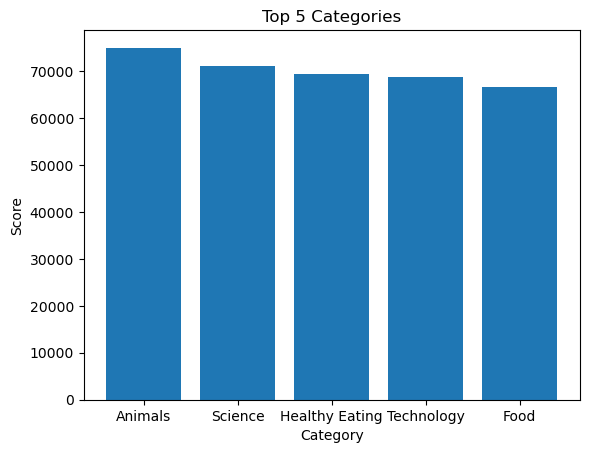

In [157]:
plt.bar(top_5["Category"], top_5["Score"])
plt.title("Top 5 Categories")
plt.xlabel("Category")
plt.ylabel("Score")
plt.show()

In [83]:
category_score = master.groupby("Category")["Score"].sum().sort_values(ascending=False)
cat_score = category_score.reset_index()
cat_score

,Category,Score
0,Animals,74965
1,Science,71168
2,Healthy Eating,69339
3,Technology,68738
4,Food,66676
5,Culture,66579
6,Travel,64880
7,Cooking,64756
8,Soccer,57783
9,Education,57436


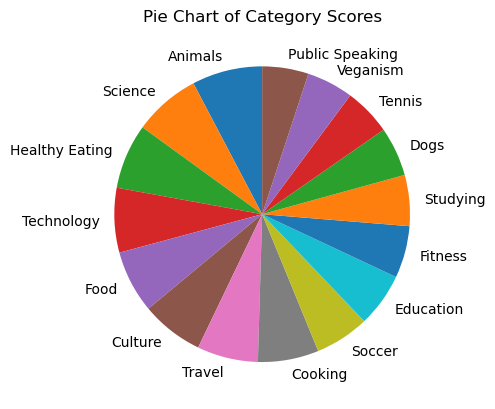

In [101]:
plt.pie(cat_score["Score"], labels = cat_score['Category'], startangle=90)
plt.title("Pie Chart of Category Scores")
plt.show()

In [115]:
top_1 = master[master["Category"] == "Animals"]
top_1

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
64,4fa14453-7b29-4302-b51f-9aa23b472c1b,disgust,2020-09-08 15:30:59,audio,Animals,negative,0
67,4478d98e-43e8-4dc0-884d-c1115aa8b970,disgust,2020-07-05 20:02:47,audio,Animals,negative,0
198,f01ec49c-3179-43bb-b127-2b1a73f34b06,disgust,2021-01-21 16:00:16,photo,Animals,negative,0
199,f01ec49c-3179-43bb-b127-2b1a73f34b06,disgust,2021-02-25 22:40:44,photo,Animals,negative,0
224,2cbbdbf6-b34e-4fbb-bdc6-904e61f91ce7,disgust,2020-12-26 08:14:19,photo,Animals,negative,0
...,...,...,...,...,...,...,...
24550,cab37e79-0e76-4bd2-b6bd-2fc8bf66ca99,adore,2020-11-26 06:17:45,photo,Animals,positive,72
24551,cab37e79-0e76-4bd2-b6bd-2fc8bf66ca99,adore,2020-10-16 06:13:12,photo,Animals,positive,72
24555,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2020-11-18 17:02:24,photo,Animals,positive,72
24556,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2020-10-03 18:30:41,photo,Animals,positive,72


In [153]:
top_1_reactions = top_1["Reaction Type"].value_counts().sort_values(ascending=True).reset_index()
top_1_reactions

,Reaction Type,count
0,indifferent,100
1,like,101
2,interested,110
3,adore,114
4,dislike,115
5,intrigued,116
6,love,119
7,heart,120
8,worried,121
9,disgust,122


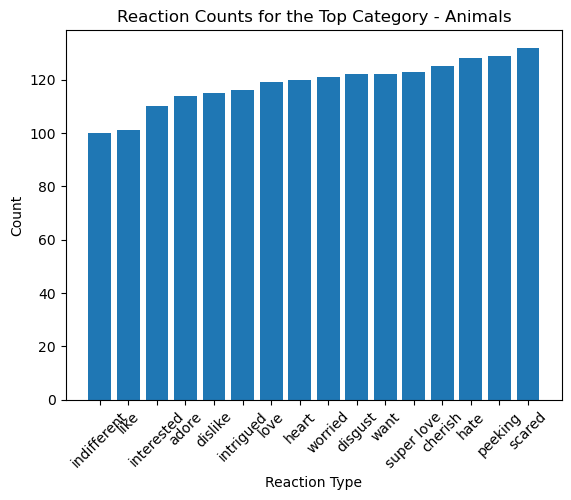

In [159]:
plt.bar(top_1_reactions["Reaction Type"], top_1_reactions["count"])
plt.xticks(rotation=45)
plt.xlabel("Reaction Type")
plt.ylabel("Count")
plt.title("Reaction Counts for the Top Category - Animals")
plt.show()

In [293]:
month_data = pd.to_datetime(master["Datetime"]).dt.month.value_counts().reset_index()
month_data_sorted = month_data.sort_values(by="Datetime", ascending=True).rename(columns={"Datetime":"Month"})

In [295]:
month_data_sorted

,Month,count
1,1,2126
11,2,1914
9,3,2012
10,4,1974
0,5,2138
8,6,2021
4,7,2070
2,8,2114
7,9,2022
5,10,2056


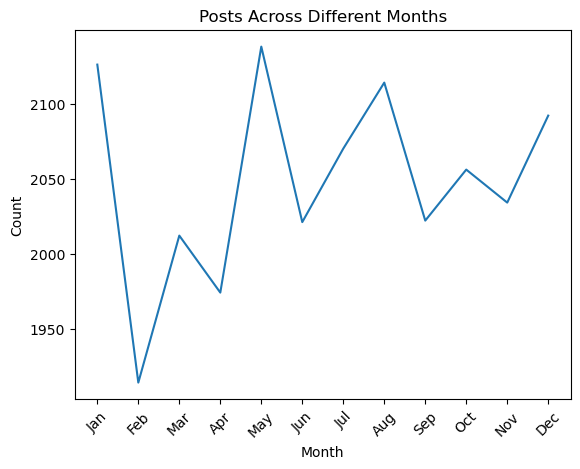

In [306]:
plt.plot(month_data_sorted["Month"], month_data_sorted["count"])
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Posts Across Different Months")
plt.show()
